# Medical Cost Personal Insurance Project
## Created By : Jyoti Kumari


Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

### READ DATA 

In [2]:
df = pd.read_csv("medical_cost_insurance.csv")

### EXPLORE DATA 

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
515,58,male,35.700,0,no,southwest,11362.75500
1304,42,male,24.605,2,yes,northeast,21259.37795
69,28,male,23.980,3,yes,southeast,17663.14420


### DATA PREPROCESSING 

In [11]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [12]:
# one hot encoder for sex 
converted_sex = pd.get_dummies(df['sex'],drop_first=False,dtype='int')

In [13]:
converted_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [14]:
df = pd.concat([df,converted_sex],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [15]:
df.drop(['sex'],axis=1,inplace=True)


In [16]:
df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [17]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
coverted_smoker = pd.get_dummies(df['smoker'],drop_first=False,dtype='int')
coverted_smoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [19]:
df = pd.concat([df,coverted_smoker],axis=1)
df.head()

,age,bmi,children,smoker,region,charges,female,male,no,yes
0,19,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,28.880,0,no,northwest,3866.85520,0,1,1,0


In [20]:
df.drop(['smoker'],inplace=True,axis=1)
df.head()

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


### **Ordinal Number Encoding**

In [21]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
region_values={"southwest":1,
             "southeast":2,
              "northwest":3,
              "northeast":4}

In [23]:
region_values

{'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

In [24]:
df["region_encodeing"]=df.region.map (region_values)

In [25]:
df.head()

,age,bmi,children,region,charges,female,male,no,yes,region_encodeing
0,19,27.900,0,southwest,16884.92400,1,0,0,1,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0,2
2,28,33.000,3,southeast,4449.46200,0,1,1,0,2
3,33,22.705,0,northwest,21984.47061,0,1,1,0,3
4,32,28.880,0,northwest,3866.85520,0,1,1,0,3


In [26]:
df.drop(['region'],inplace=True,axis=1)

In [27]:
df.head()

,age,bmi,children,charges,female,male,no,yes,region_encodeing
0,19,27.900,0,16884.92400,1,0,0,1,1
1,18,33.770,1,1725.55230,0,1,1,0,2
2,28,33.000,3,4449.46200,0,1,1,0,2
3,33,22.705,0,21984.47061,0,1,1,0,3
4,32,28.880,0,3866.85520,0,1,1,0,3


In [28]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
female                int64
male                  int64
no                    int64
yes                   int64
region_encodeing      int64
dtype: object

### DATA VISULIZATION 

Text(0.5, 1.0, 'Distribution of Charges')

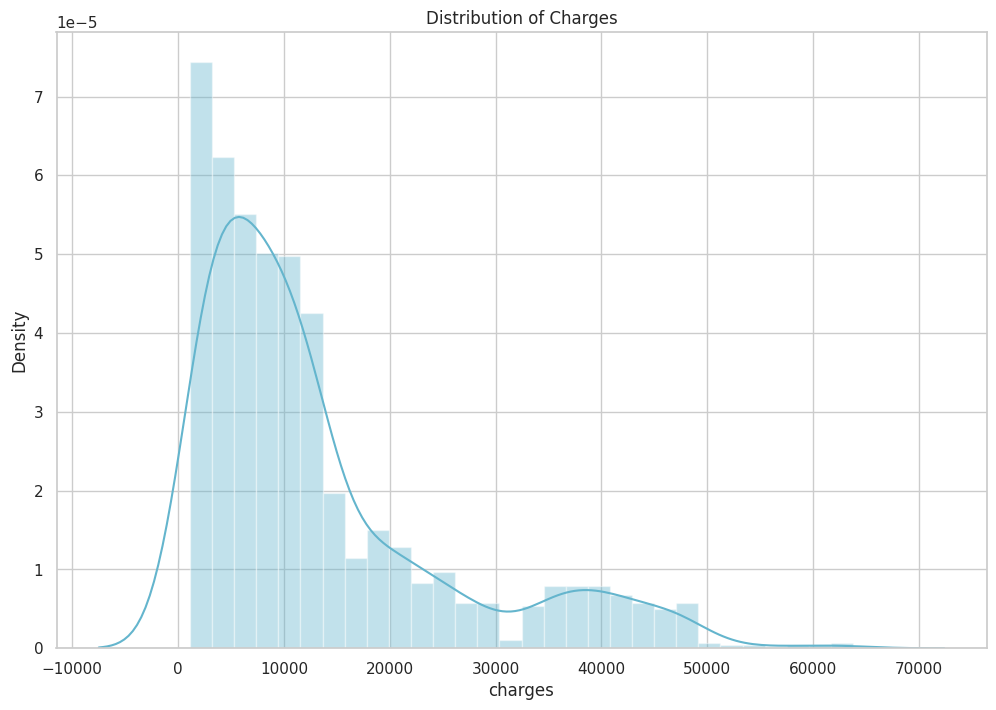

In [29]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

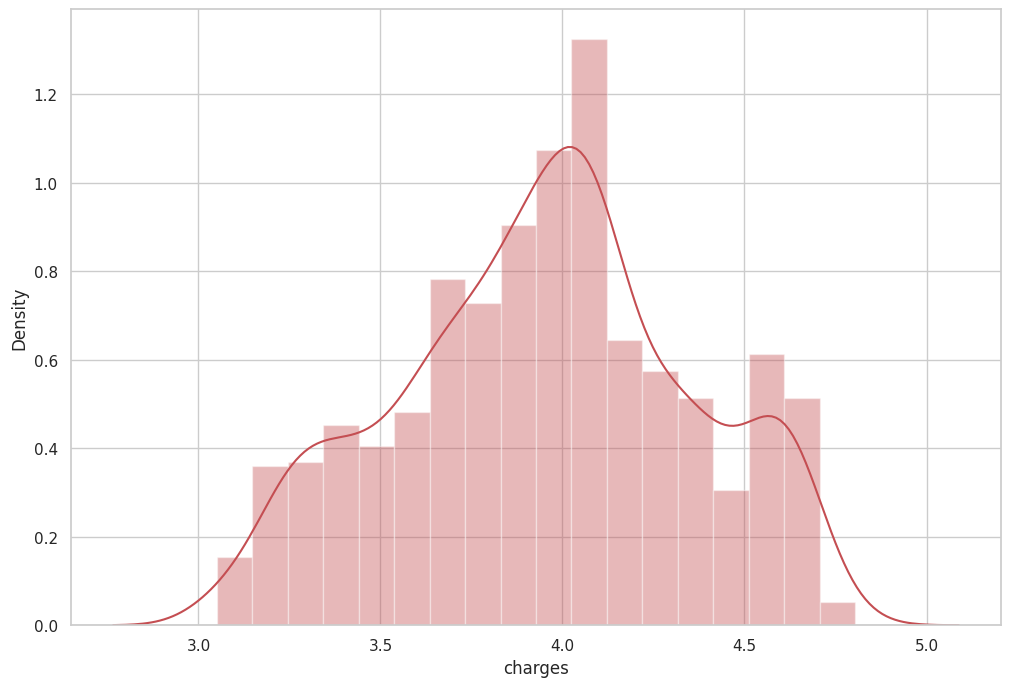

In [30]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

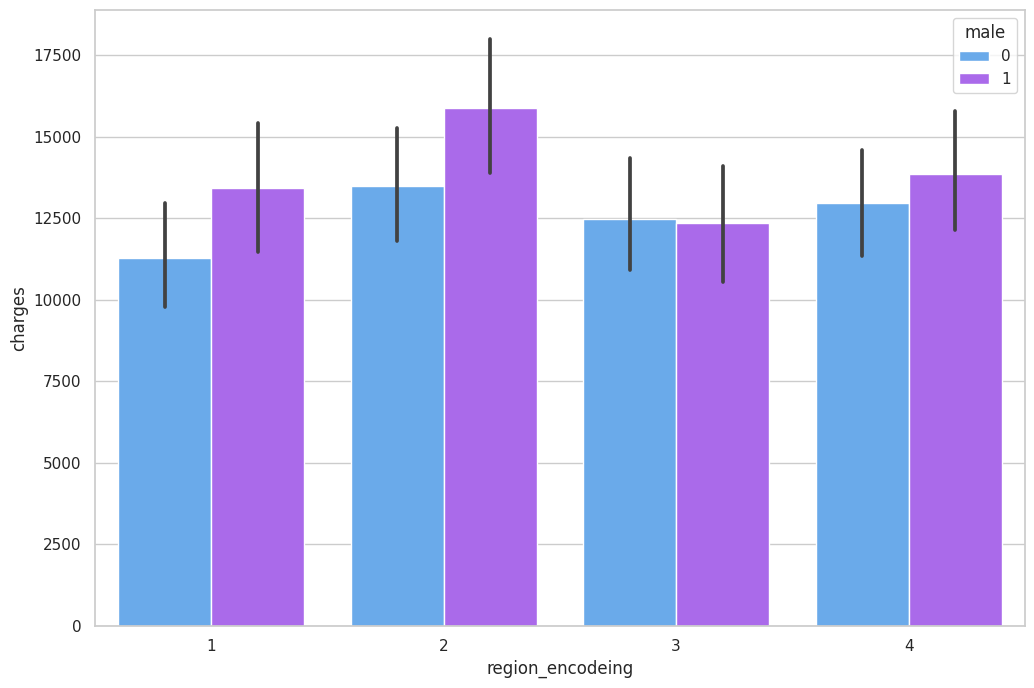

In [31]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='male', data=df, palette='cool')

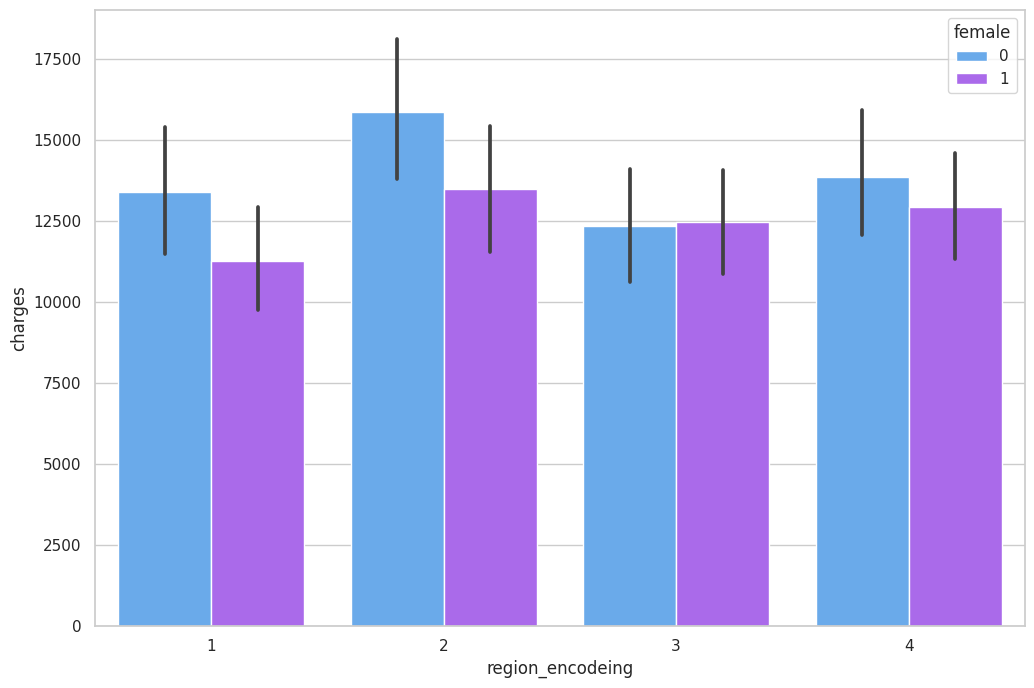

In [32]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='female', data=df, palette='cool')

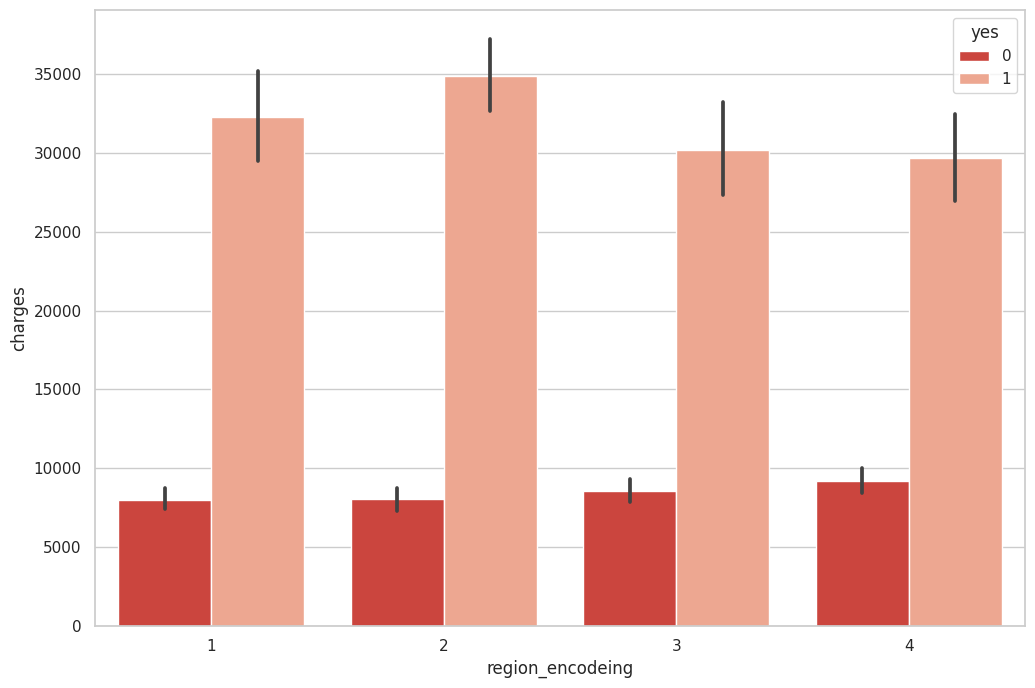

In [33]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region_encodeing', y = 'charges',
                 hue='yes', data=df, palette='Reds_r')

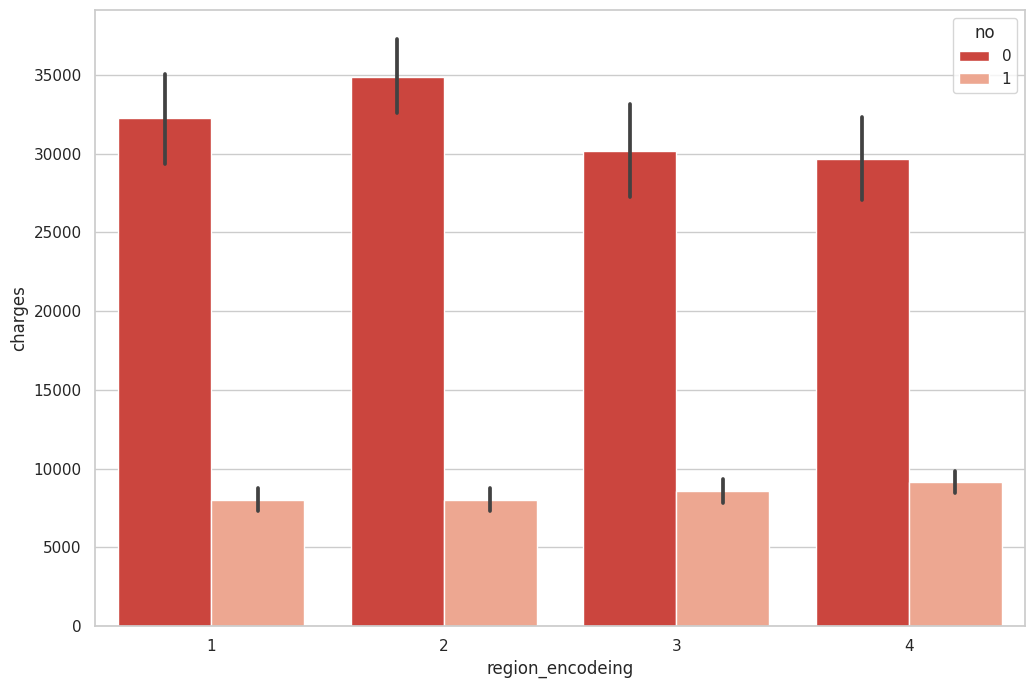

In [34]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region_encodeing', y = 'charges',
                 hue='no', data=df, palette='Reds_r')

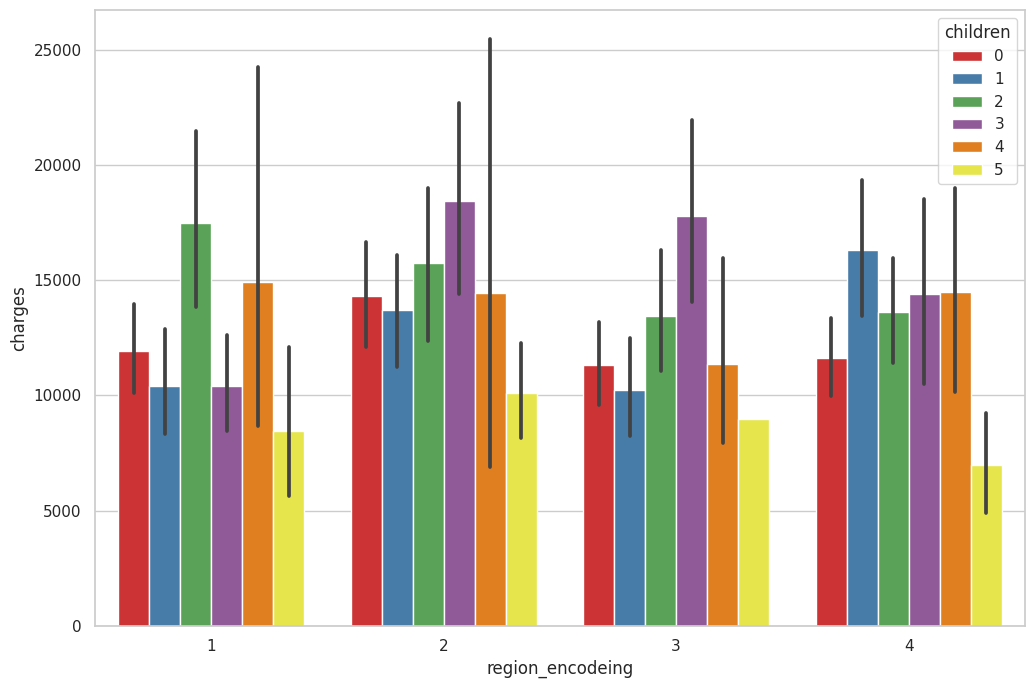

In [35]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='children', data=df, palette='Set1')

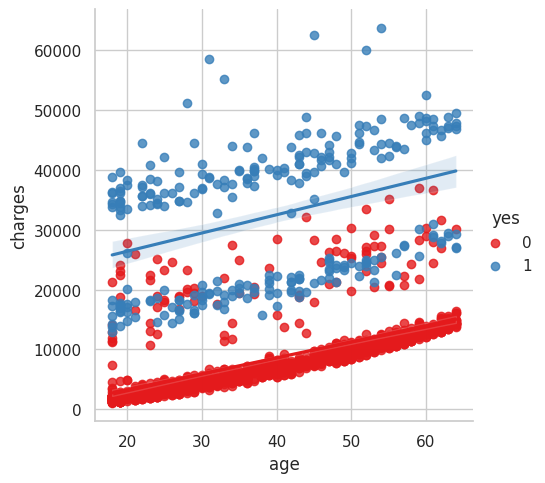

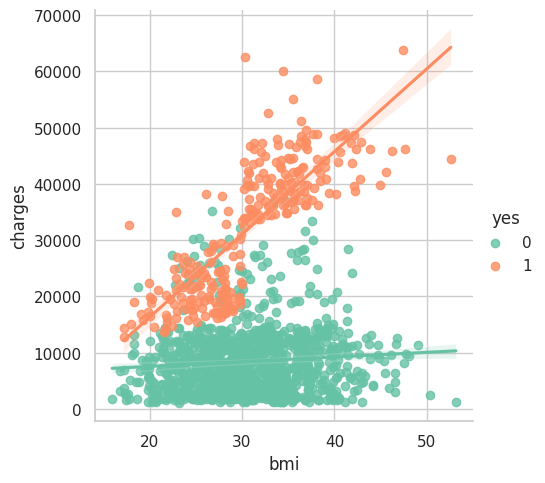

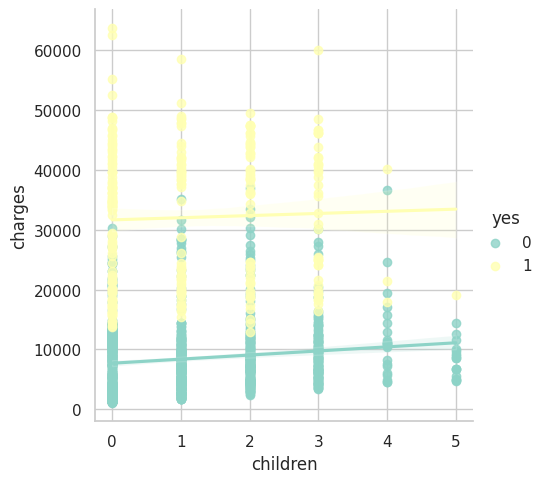

In [36]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='yes', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='yes', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='yes', palette='Set3')

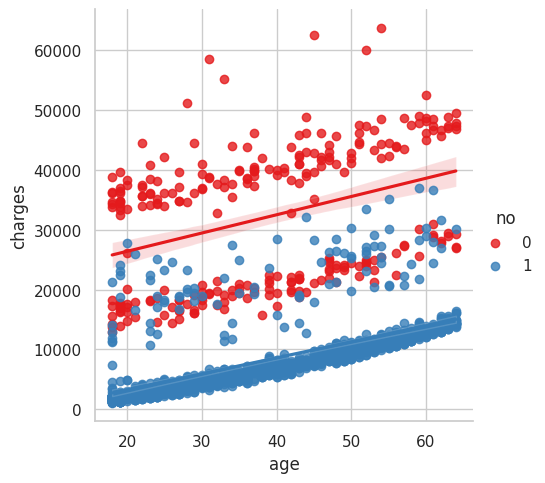

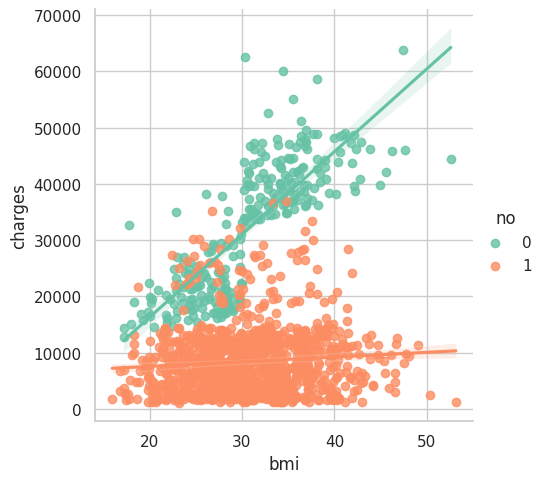

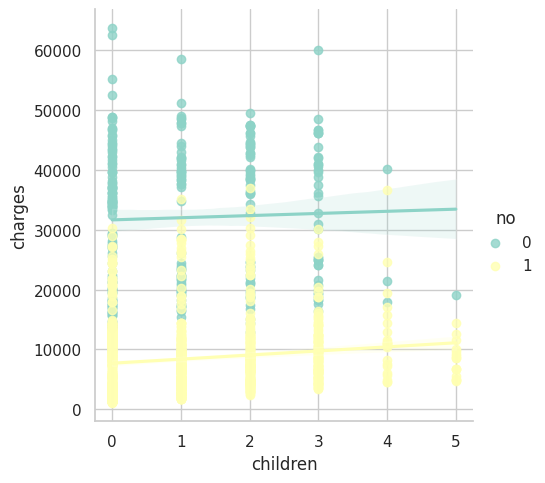

In [37]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='no', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='no', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='no', palette='Set3')

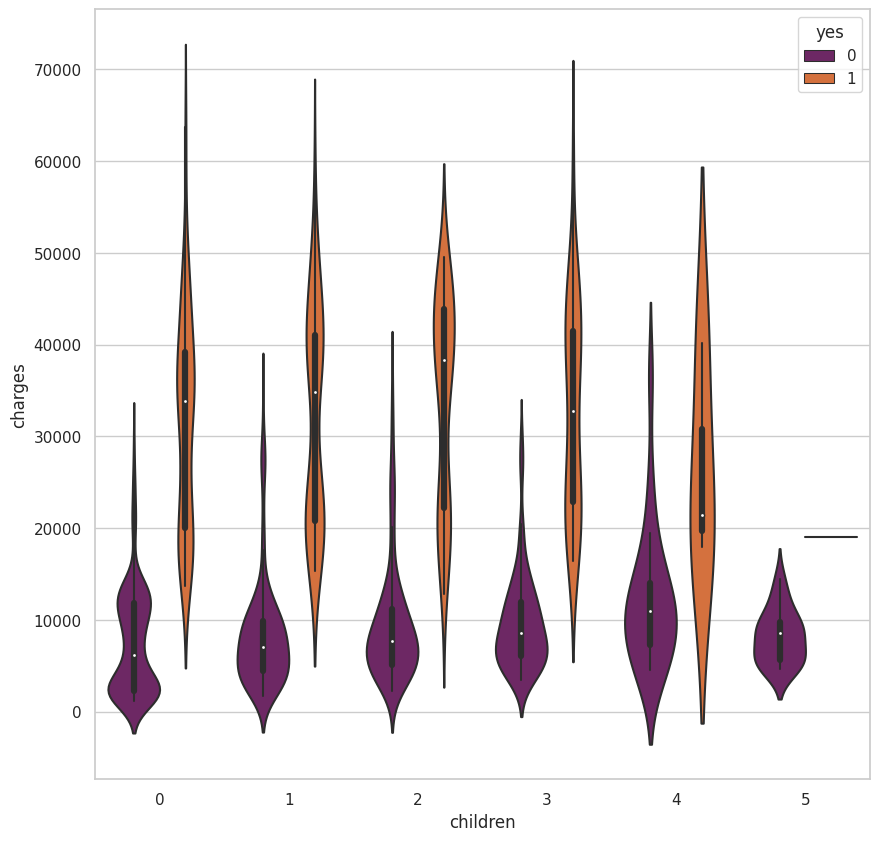

In [38]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='yes', palette='inferno')

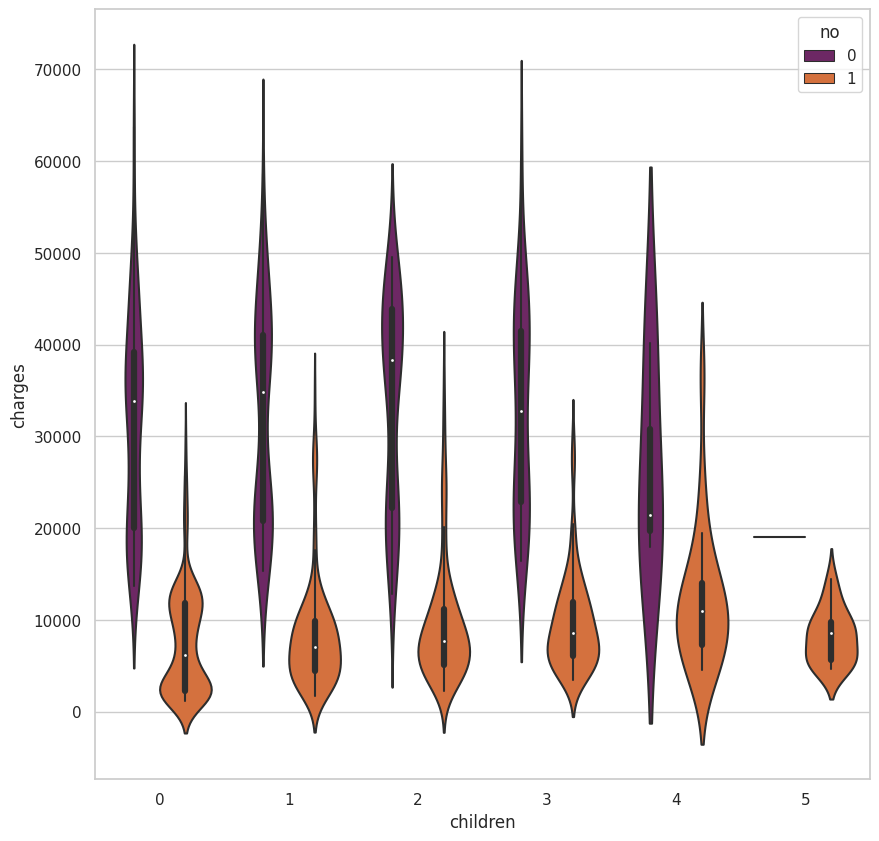

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='no', palette='inferno')

### DATA PREPROCESSING 

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as holdout


In [41]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [42]:
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

### LINEAR REGRESSION MODEL

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)


In [44]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-1043.740732584225
[   253.99185244    328.40261701    443.72929547     12.16227549
    -12.16227549 -11784.43974191  11784.43974191    288.50857254]
0.799874714544996


### Ridge Regression model 

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)


In [46]:
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-1051.4687167008615
[ 2.53943078e+02  3.28367618e+02  4.43910751e+02  1.14544640e+01
 -1.14544640e+01 -1.17674418e+04  1.17674418e+04  2.88706682e+02]
0.7997873670369501


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)


In [48]:
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

10728.94761453909
[ 2.53991729e+02  3.28389366e+02  4.43587023e+02  2.34596925e+01
 -6.69201986e-13 -2.35676147e+04  9.77694360e-12  2.88340118e+02]
0.7998690403329299


### Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100  ,n_jobs = -1)
Rfr.fit(x_train,y_train)



In [50]:
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (mean_squared_error(x_train_pred, y_train),
       mean_squared_error(x_test_pred, y_test)))

      

MSE train data: 3600901.865, MSE test data: 19672394.101
